In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('winequality-red.csv')
print("Размер датасета:", df.shape)
missing_values = df.isnull().sum()
print("\nПропущенные значения:")
print(missing_values)

print("\nПервые 5 строк данных:")
print(df.head())

Размер датасета: (1599, 12)

Пропущенные значения:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Первые 5 строк данных:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.

1. ОПИСАНИЕ ДАТАСЕТА

Предметная область: Химический состав и качество красного вина
Источник данных: UCI Machine Learning Repository
Характер данных: Реальные данные

Атрибуты:
fixed acidity - фиксированная кислотность

volatile acidity - летучая кислотность

citric acid - содержание лимонной кислоты

residual sugar - остаточный сахар

chlorides - содержание хлоридов

free sulfur dioxide - свободный диоксид серы

total sulfur dioxide - общий диоксид серы

density - плотность

pH - уровень pH

sulphates - содержание сульфатов

alcohol - содержание алкоголя

quality - качество вина (целевая переменная)



Задача анализа: Прогнозирование качества вина на основе химических характеристик

In [14]:
print("Основные статистики:")
print(df.describe())

Основные статистики:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

In [15]:
attributes = df.columns
outliers_summary = {}

for attr in attributes:
    print(f"\n--- Атрибут: {attr} ---")
    print(f"Среднее значение: {df[attr].mean():.4f}")
    print(f"Стандартное отклонение: {df[attr].std():.4f}")
    print(f"Медиана: {df[attr].median():.4f}")
    print(f"Минимум: {df[attr].min():.4f}")
    print(f"Максимум: {df[attr].max():.4f}")


--- Атрибут: fixed acidity ---
Среднее значение: 8.3196
Стандартное отклонение: 1.7411
Медиана: 7.9000
Минимум: 4.6000
Максимум: 15.9000

--- Атрибут: volatile acidity ---
Среднее значение: 0.5278
Стандартное отклонение: 0.1791
Медиана: 0.5200
Минимум: 0.1200
Максимум: 1.5800

--- Атрибут: citric acid ---
Среднее значение: 0.2710
Стандартное отклонение: 0.1948
Медиана: 0.2600
Минимум: 0.0000
Максимум: 1.0000

--- Атрибут: residual sugar ---
Среднее значение: 2.5388
Стандартное отклонение: 1.4099
Медиана: 2.2000
Минимум: 0.9000
Максимум: 15.5000

--- Атрибут: chlorides ---
Среднее значение: 0.0875
Стандартное отклонение: 0.0471
Медиана: 0.0790
Минимум: 0.0120
Максимум: 0.6110

--- Атрибут: free sulfur dioxide ---
Среднее значение: 15.8749
Стандартное отклонение: 10.4602
Медиана: 14.0000
Минимум: 1.0000
Максимум: 72.0000

--- Атрибут: total sulfur dioxide ---
Среднее значение: 46.4678
Стандартное отклонение: 32.8953
Медиана: 38.0000
Минимум: 6.0000
Максимум: 289.0000

--- Атрибут: densi

In [17]:
# Определение количества выбросов
Q1 = df[attr].quantile(0.25)
Q3 = df[attr].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[attr] < lower_bound) | (df[attr] > upper_bound)]
outliers_count = len(outliers)
outliers_summary[attr] = outliers_count
print(f"Количество выбросов: {outliers_count}")

Количество выбросов: 28


In [18]:
print("\nСводка по выбросам:")
for attr, count in outliers_summary.items():
    if count > 0:
        print(f"{attr}: {count} выбросов")


Сводка по выбросам:
quality: 28 выбросов


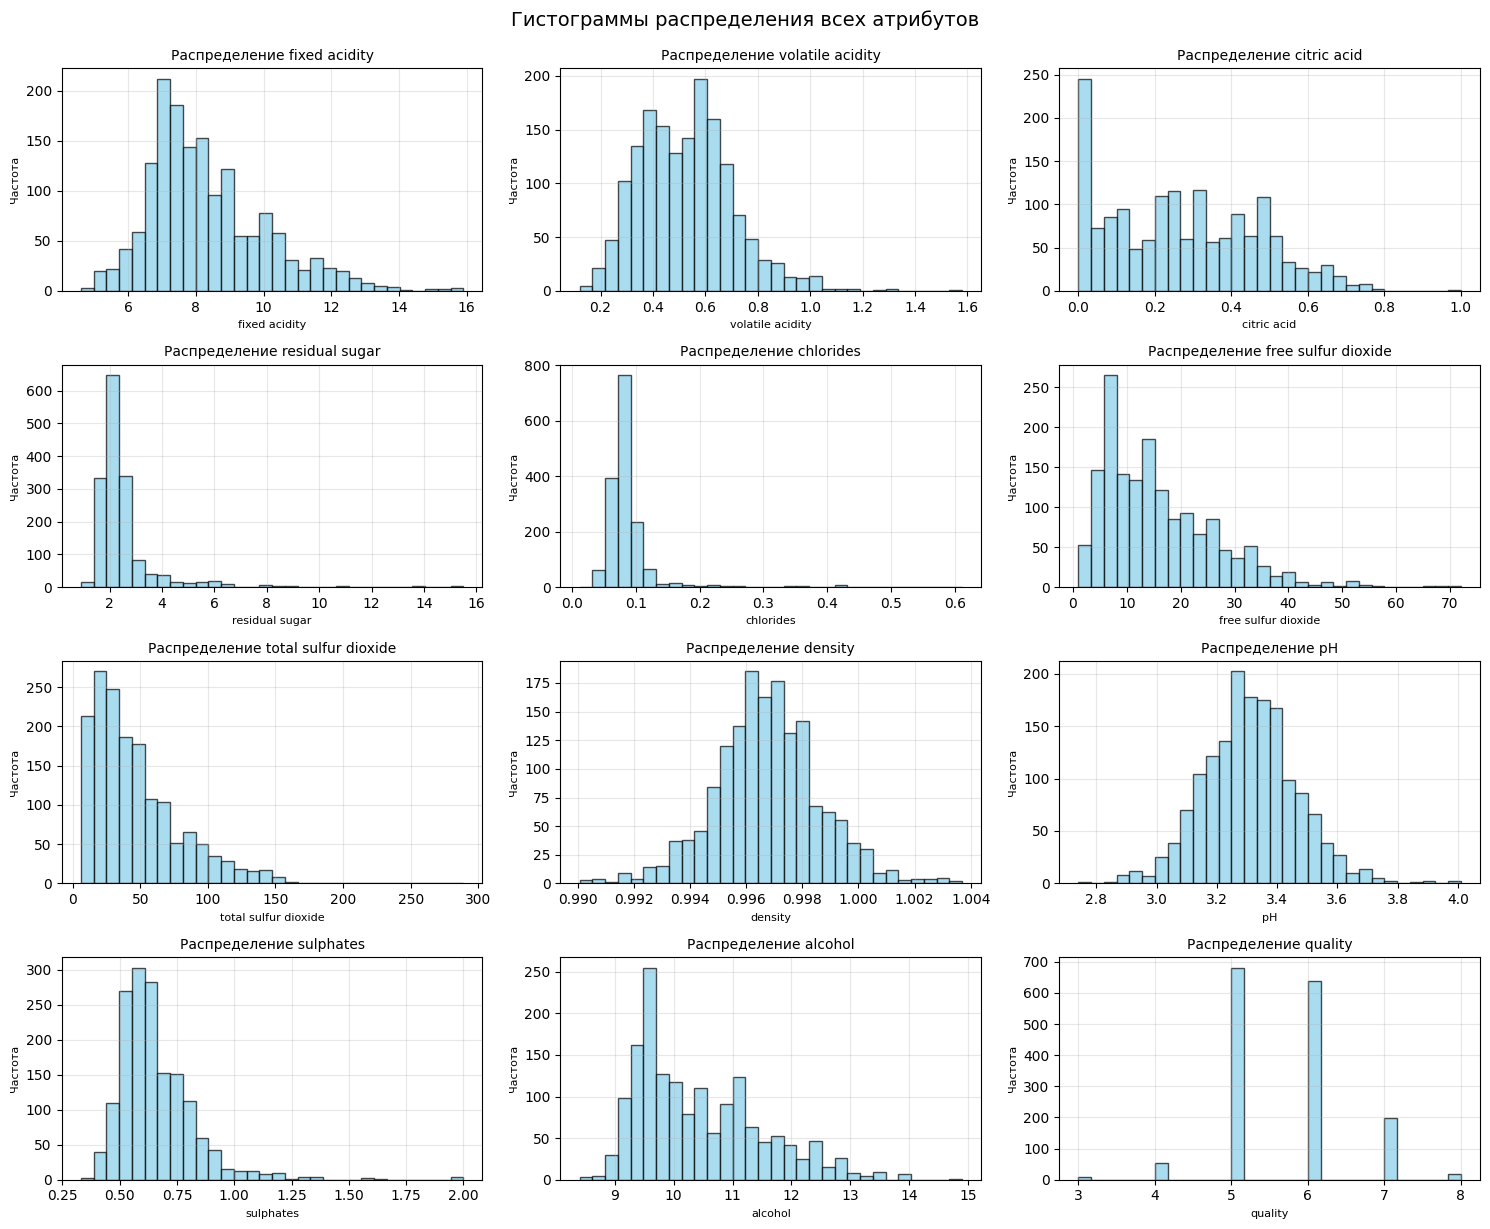

In [19]:
# Гистограммы для всех атрибутов
plt.figure(figsize=(15, 12))
for i, col in enumerate(attributes, 1):
    plt.subplot(4, 3, i)
    df[col].hist(bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title(f'Распределение {col}', fontsize=10)
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Частота', fontsize=8)
    plt.grid(alpha=0.3)
plt.tight_layout()
plt.suptitle('Гистограммы распределения всех атрибутов', y=1.02, fontsize=14)
plt.show()

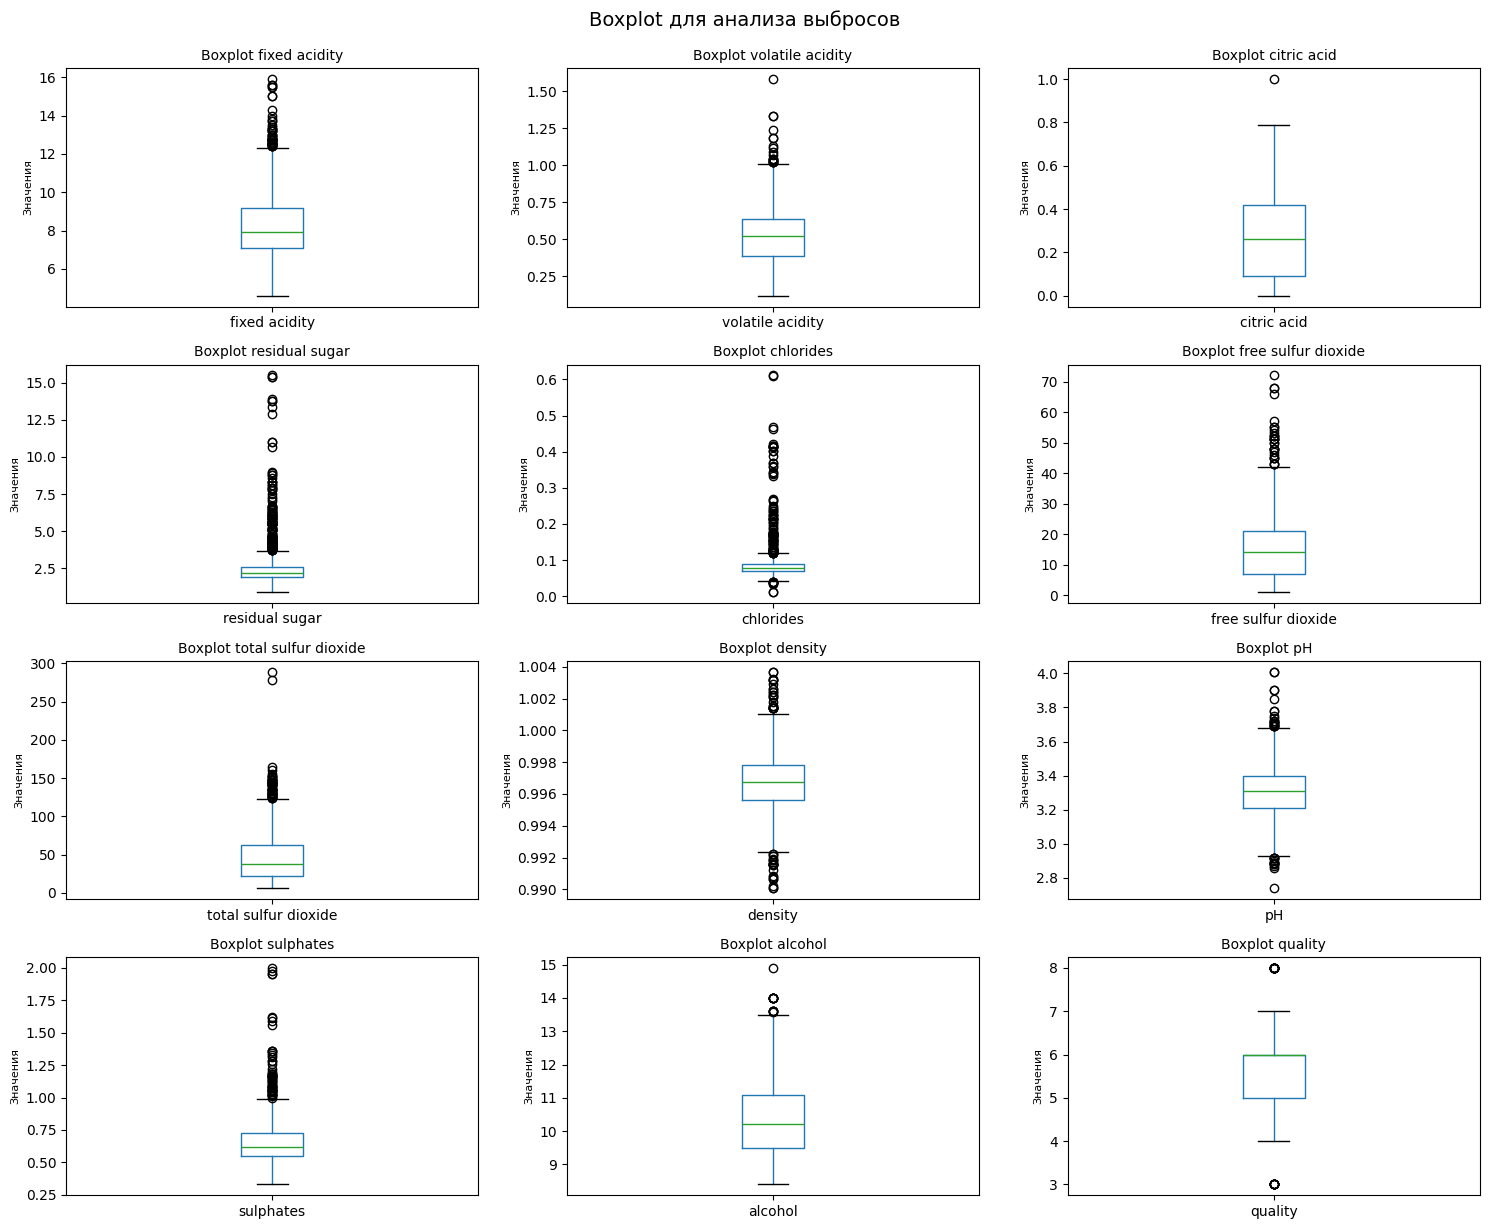

In [20]:
# Выявление выбросов
plt.figure(figsize=(15, 12))
for i, col in enumerate(attributes, 1):
    plt.subplot(4, 3, i)
    df.boxplot(column=col, grid=False)
    plt.title(f'Boxplot {col}', fontsize=10)
    plt.ylabel('Значения', fontsize=8)
plt.tight_layout()
plt.suptitle('Boxplot для анализа выбросов', y=1.02, fontsize=14)
plt.show()

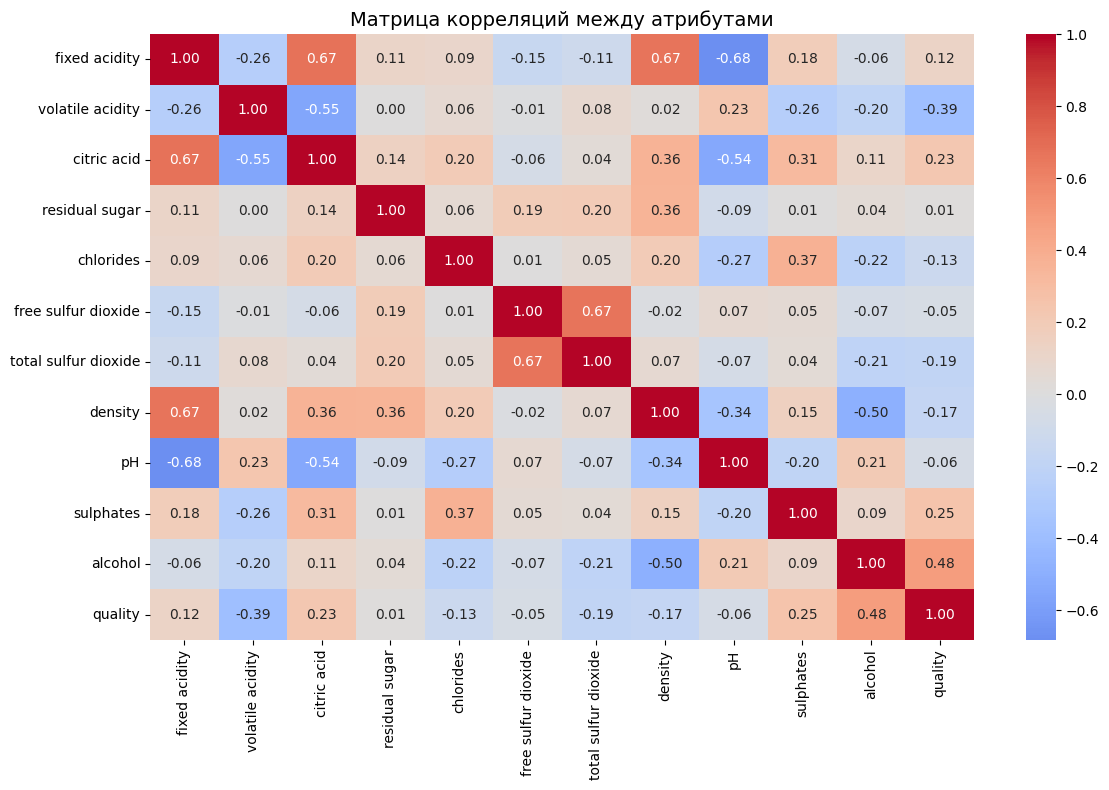

In [25]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
           fmt='.2f')
plt.title('Матрица корреляций между атрибутами', fontsize=14)
plt.tight_layout()
plt.show()

In [27]:
# Атрибуты с высокой корреляцией
print("Высококоррелированые пары (|r| > 0.5):")
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            strong_corr.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_value
            ))

# Сортировка по убыванию абсолютного значения корреляции
strong_corr.sort(key=lambda x: abs(x[2]), reverse=True)
for pair in strong_corr:
    correlation_type = "положительная" if pair[2] > 0 else "отрицательная"
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f} ({correlation_type})")

# Атрибуты с низкой корреляцией
print("\nПары с низкой корреляцией (|r| < 0.1):")
weak_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) < 0.1:
            weak_corr.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                corr_value
            ))

for pair in weak_corr[:10]:  # Показать первые 10
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Корреляции с целевой переменной (quality)
print("\nКорреляции с качеством вина (quality):")
quality_correlations = correlation_matrix['quality'].sort_values(ascending=False)
for attr, corr in quality_correlations.items():
    if attr != 'quality':
        print(f"{attr}: {corr:.3f}")

Высококоррелированые пары (|r| > 0.5):
fixed acidity - pH: -0.683 (отрицательная)
fixed acidity - citric acid: 0.672 (положительная)
fixed acidity - density: 0.668 (положительная)
free sulfur dioxide - total sulfur dioxide: 0.668 (положительная)
volatile acidity - citric acid: -0.552 (отрицательная)
citric acid - pH: -0.542 (отрицательная)

Пары с низкой корреляцией (|r| < 0.1):
fixed acidity - chlorides: 0.094
fixed acidity - alcohol: -0.062
volatile acidity - residual sugar: 0.002
volatile acidity - chlorides: 0.061
volatile acidity - free sulfur dioxide: -0.011
volatile acidity - total sulfur dioxide: 0.076
volatile acidity - density: 0.022
citric acid - free sulfur dioxide: -0.061
citric acid - total sulfur dioxide: 0.036
residual sugar - chlorides: 0.056

Корреляции с качеством вина (quality):
alcohol: 0.476
sulphates: 0.251
citric acid: 0.226
fixed acidity: 0.124
residual sugar: 0.014
free sulfur dioxide: -0.051
pH: -0.058
chlorides: -0.129
density: -0.175
total sulfur dioxide: -

Наиболее значимые атрибуты для анализа: ['quality', 'alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'total sulfur dioxide']


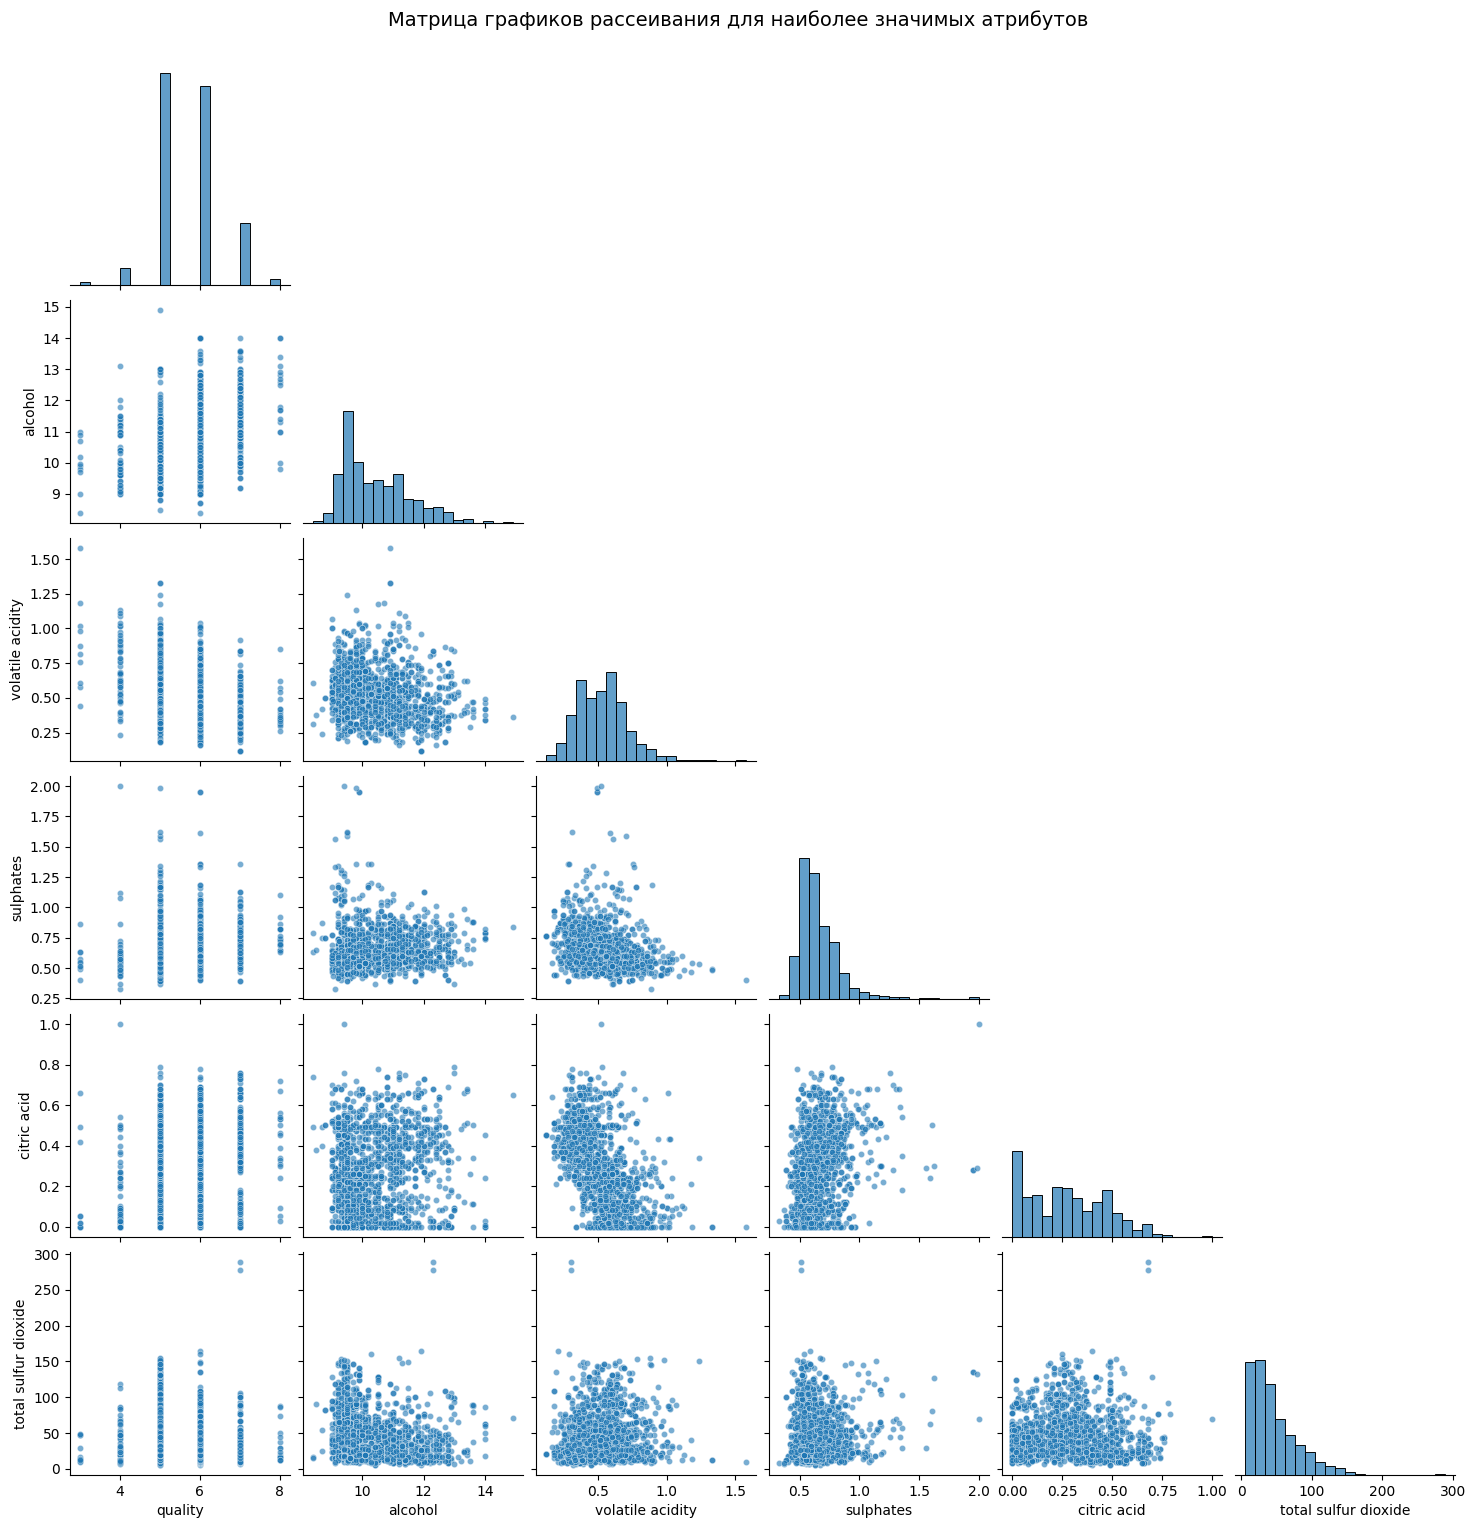

In [31]:
top_features = correlation_matrix['quality'].abs().sort_values(ascending=False).index[:6]

print(f"Наиболее значимые атрибуты для анализа: {list(top_features)}")

sns.pairplot(df[top_features],
             diag_kind='hist',
             corner=True,
             plot_kws={'alpha': 0.6, 's': 20},
             diag_kws={'alpha': 0.7, 'bins': 20})
plt.suptitle('Матрица графиков рассеивания для наиболее значимых атрибутов',
             y=1.02, fontsize=14)
plt.show()

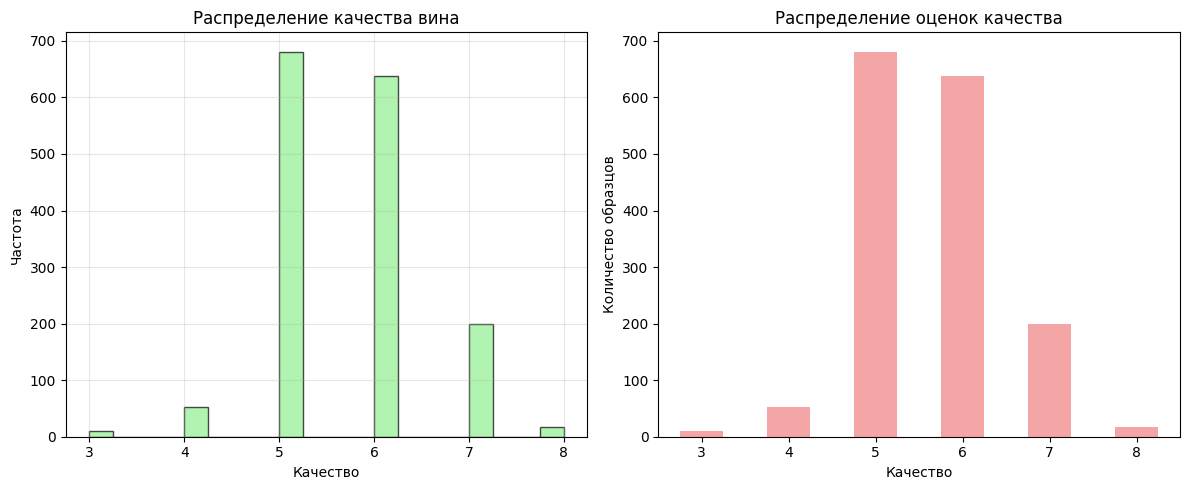

Среднее качество: 5.64
Медиана качества: 6.00
Стандартное отклонение качества: 0.81
Диапазон качества: 3 - 8


In [32]:
# Анализ распределения качества
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['quality'].hist(bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('Распределение качества вина')
plt.xlabel('Качество')
plt.ylabel('Частота')
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
df['quality'].value_counts().sort_index().plot(kind='bar', alpha=0.7, color='lightcoral')
plt.title('Распределение оценок качества')
plt.xlabel('Качество')
plt.ylabel('Количество образцов')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

print(f"Среднее качество: {df['quality'].mean():.2f}")
print(f"Медиана качества: {df['quality'].median():.2f}")
print(f"Стандартное отклонение качества: {df['quality'].std():.2f}")
print(f"Диапазон качества: {df['quality'].min()} - {df['quality'].max()}")

ОСНОВНЫЕ ВЫВОДЫ:

1. КАЧЕСТВО ДАННЫХ:


   Пропущенные значения: отсутствуют

   
   Выбросы: присутствуют в большинстве атрибутов, особенно в residual sugar, chlorides, free sulfur dioxide

3. СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ:

   
   Данные имеют различный масштаб, требуется нормализация

   
   Распределения в основном нормальные с некоторыми отклонениями

5. КОРРЕЛЯЦИОННЫЙ АНАЛИЗ:

   
   Сильные корреляции: fixed acidity и pH (-0.68), fixed acidity и citric acid (0.67)

   
   Наибольшее влияние на качество: alcohol (0.48), volatile acidity (-0.39)

7. ЦЕЛЕВАЯ ПЕРЕМЕННАЯ:

   
   Качество оценивается по шкале от 3 до 8

   
   Распределение смещено в сторону средних значений (5-6)